In [1]:
# librerías
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from itertools import product
# guardado de gráficos
def save_plot(title='plot', path='./informe/img/'):
  plt.savefig(f'{path}{title}.png', dpi=300, bbox_inches='tight')

$\underline{\text{TP2 - Ejercicio 8}}$  
Entrenar un perceptrón multicapa que resuelva una $\text{XOR}$ de $2$ entradas mediante simulated annealing. Graficar el error a lo largo del proceso de aprendizaje.

In [2]:
layers = [2, 3, 1] # neuronas por capa del MLP
n_layers = len(layers)
weights = [np.random.randn(l, m) for l, m in zip(layers[1:], layers[:-1])]
biases = [np.random.randn(l) for l in layers[1:]] # generar una solución inicial

get_cost = lambda y_true, y_pred: np.mean((y_true - y_pred) ** 2) # mse
get_error = lambda y_true, y_pred: np.mean(y_true != y_pred) # error de clasificación

sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = lambda x: np.tanh(x)

def predict(input, weights, biases):
    output = input
    for w, b in zip(weights[:-1], biases[:-1]):
        output = tanh(np.dot(w, output) + b)
    output = sigmoid(np.dot(weights[-1], output) + biases[-1])
    output = 1 if output >= 0.5 else 0 # estoy clasificando
    return output

def perturbate(solution, intensity):
    perturbations = [np.random.normal(size=s.shape, scale=intensity) for s in solution]
    new_solution = [s + 0.0001 * intensity * p for s, p in zip(solution, perturbations)] # perturbo en proporción a la temperatura
    return new_solution

# datos de entrenamiento
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

# listas para los gráficos
errors = []
costs = []
temperatures = []
# simulated annealing
alpha = 300
beta = 1
n_iter = 3000
delta = 1
epsilon = 0.9
temperature = alpha
best_weights = weights
best_biases = biases
y_pred = [predict(x, weights, biases) for x in x_train]
best_cost = get_cost(y_train, y_pred)
while temperature > beta:
    weights = best_weights
    biases = best_biases
    for i in range(n_iter):
        new_weights = perturbate(weights, temperature)
        new_biases = perturbate(biases, temperature)
        # predicciones
        y_pred = [predict(x, weights, biases) for x in x_train]
        new_y_pred = [predict(x, new_weights, new_biases) for x in x_train]
        # costos
        cost = get_cost(y_train, y_pred)
        new_cost = get_cost(y_train, new_y_pred)
        # guardar la mejor solución
        if new_cost < best_cost:
            best_weights = new_weights
            best_biases = new_biases
            best_cost = new_cost
        # actualizar la solución
        if new_cost < cost or np.random.rand() < np.exp((new_cost - cost) / (delta * temperature)): # cuanto más chico es el delta más probable es pasar a una solución peor a la actual
            weights = new_weights
            biases = new_biases
            cost = new_cost
        # verbose
        if i % 100 == 0:
            print(f'temperature: {temperature:.2f}, \t n_iter: {i}, \t cost: {cost:.2f}, \t best_cost: {best_cost:.2f}')
    error = get_error(y_train, y_pred)
    cost = get_cost(y_train, y_pred)
    errors.append(error)
    costs.append(cost)

    temperature *= epsilon
    temperatures.append(temperature)

temperature: 300.00, 	 n_iter: 0, 	 cost: 0.50, 	 best_cost: 0.50
temperature: 300.00, 	 n_iter: 100, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 200, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 300, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 400, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 500, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 600, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 700, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 800, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 900, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1000, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1100, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1200, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1300, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1400, 	 cost: 0

/tmp/ipykernel_721794/1886118188.py:9: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


temperature: 300.00, 	 n_iter: 1600, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1700, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1800, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 1900, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2000, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2100, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2200, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2300, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2400, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2500, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2600, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2700, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2800, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 300.00, 	 n_iter: 2900, 	 cost: 0.50, 	 best_cost: 0.25
temperature: 270.00, 	 n_iter: 0, 

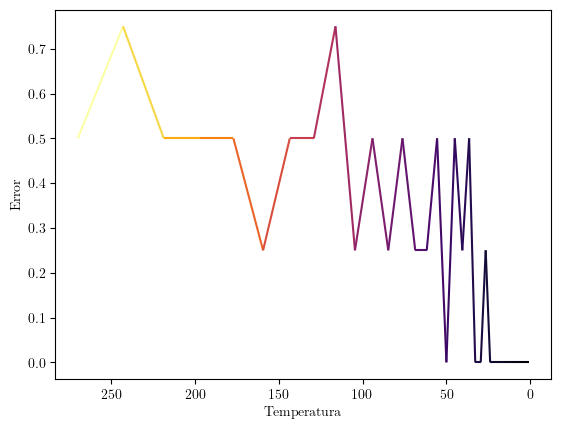

In [3]:
# por el 1 if output > 0.5 else 0 los errores y el costo terminan siendo lo mismo
points = np.array([temperatures, errors]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = plt.cm.inferno
lc = LineCollection(segments, cmap=cmap)
lc.set_array(np.array(temperatures))
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.invert_xaxis()
plt.xlabel('Temperatura')
plt.ylabel('Error')
save_plot('simulated_annealing-error_xor')
plt.show()

$\underline{\text{TP3 - Ejercicio 1}}$  
Construya una red de Kohonen de $2$ entradas que aprenda una distribución uniforme dentro del círculo unitario. Mostrar el mapa de preservación de topología. Probar con distribuciones uniformes dentro de otras figuras geométricas.

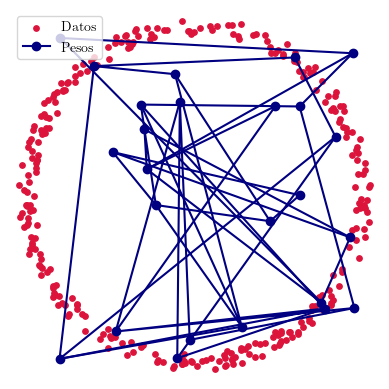

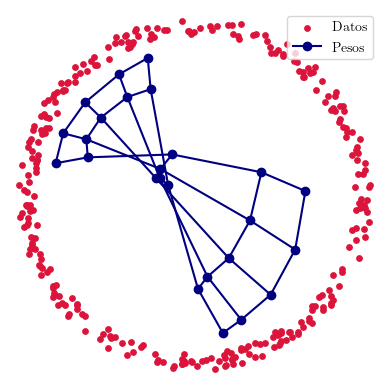

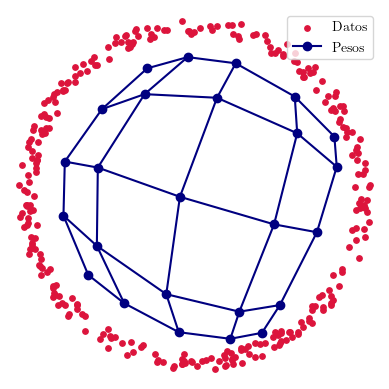

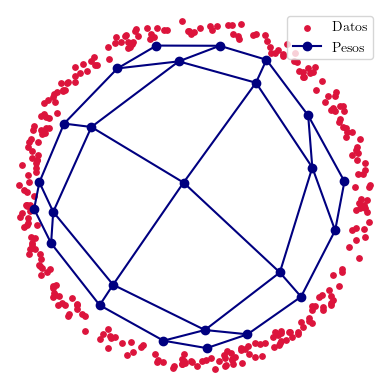

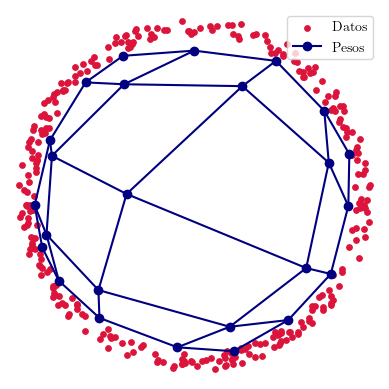

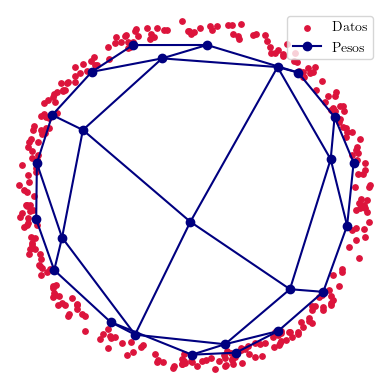

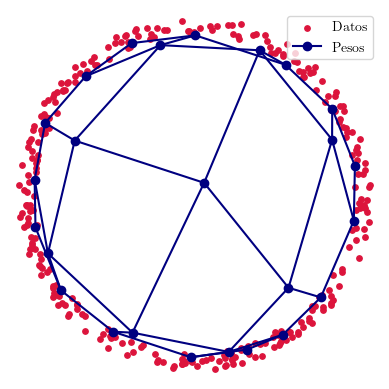

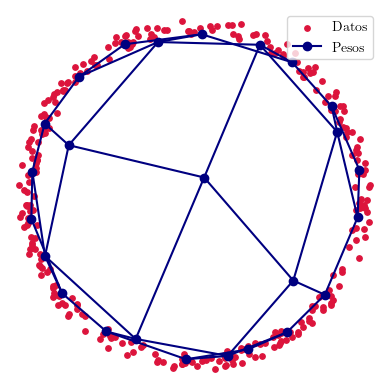

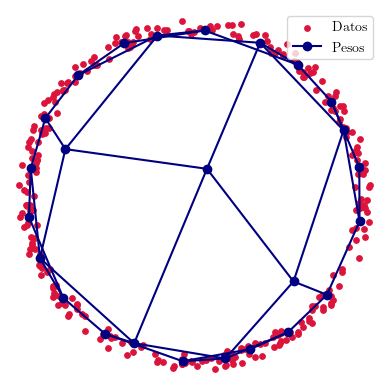

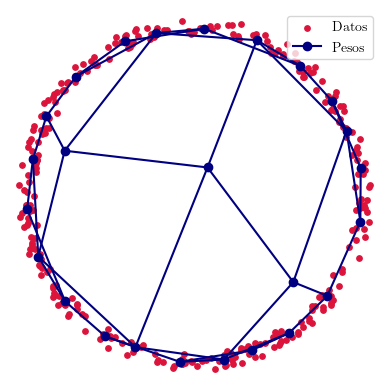

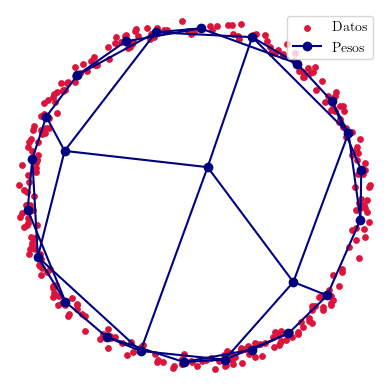

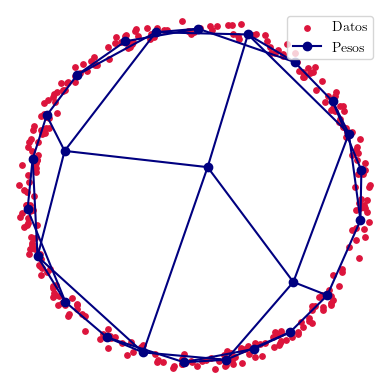

In [4]:
# distribución uniforme en el círuclo unitario
n_points = 300
unit_circle_points = []
for _ in range(n_points):
    r = np.random.uniform(0.95, 1.05)
    theta = np.random.uniform(0, 2 * np.pi)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    unit_circle_points.append([x, y])
unit_circle_points = np.array(unit_circle_points)

# rejilla en dos dimensiones
n_rows = 5
n_columns = 5
neurons = np.array([[[i, j] for i in range(n_rows)] for j in range(n_columns)])
weights = np.random.uniform(-1, 1, size=(n_rows, n_columns, 2))

euclidean_distance = lambda x, y: np.sqrt(np.sum((x - y) ** 2))

# graficar la topología de los pesos
def plot_topology(weights, points):
    plt.scatter(points[:, 0], points[:, 1], color='crimson', s=15, label="Datos")
    for i in range(weights.shape[0]):
        plt.plot(weights[i, :, 0], weights[i, :, 1], color='navy', marker='o', label="Pesos" if i == 0 else None)
    for j in range(weights.shape[1]):
        plt.plot(weights[:, j, 0], weights[:, j, 1], color='navy')
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.legend()
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

plot_topology(weights, unit_circle_points)
save_plot('kohonen-topología_iteración0')
plt.show()
# algoritmo de Kohonen
n_iter = 101
tau = n_iter / 2
eta_0 = 0.3
sigma_0 = 1.5
eta = lambda t: eta_0 * np.exp(-t / tau)
sigma = lambda t: sigma_0 * np.exp(-t / tau)
neighborhood_function = lambda x, y, sigma: np.exp(- euclidean_distance(x, y) ** 2 / (2 * sigma ** 2))
for t in range(n_iter):
    indices = np.random.choice(n_points, size=n_points, replace=False)
    for n in indices:
        # seleccionar un punto aleatorio
        random_point = unit_circle_points[n]
        # calcular la neurona ganadora
        winner_weight = weights[0, 0]
        winner_neuron = neurons[0, 0]
        winner_distance = euclidean_distance(random_point, winner_weight)
        for i in range(n_rows):
            for j in range(n_columns):
                index = i, j
                distance = euclidean_distance(random_point, weights[index])
                if distance < winner_distance:
                    winner_weight = weights[index]
                    winner_neuron = neurons[index]
                    winner_distance = distance
        # acutalizar los pesos
        for i in range(n_rows):
            for j in range(n_columns):
                index = i, j
                weights[index] += eta(t) * neighborhood_function(neurons[index], winner_neuron, sigma(t)) * (random_point - weights[index])
    if t % 10 == 0:
        plot_topology(weights, unit_circle_points)
        save_plot('kohonen-topología_iteración' + str(1 if t == 0 else t))
        plt.show()